I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [3]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
#training_file = '/u/ki/swmclau2/des/wt_trainer3/PearceRedMagicChinchillaWT.hdf5'
training_file = '/u/ki/swmclau2/des/ds_trainer3/PearceRedMagicChindhillaDS.hdf5'


em_method = 'gp'
split_method = 'random'

In [5]:
a = 0.81120
z = 1.0/a - 1.0


In [6]:
fixed_params = {'z':z}#, 'r':0.18477483}

In [7]:
emu = OriginalRecipe(training_file, method = em_method, fixed_params=fixed_params, independent_variable=None,\
                     custom_mean_function = None, downsample_factor = 1.0)

Hi


/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:287: UserWarning: WARNING: NaN detected. Skipped 23 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [8]:
#chain = np.genfromtxt('/u/ki/swmclau2/des/PearceMCMC/200_walkers_1000_steps_wtheta_exp2_hyperparams.npy')
chain = np.genfromtxt('/u/ki/swmclau2/des/PearceMCMC/200_walkers_1000_steps_delta_sigma_exp2_hyperparams.npy')

#v = chain.mean(axis = 0)
n_burn =  0
v = chain[200*n_burn:,].mean(axis = 0)

In [9]:
emu._emulator.set_parameter_vector(v)

In [10]:
#TODO other z's
sc_inv = 0.0001239041803415539
W = 0.00275848072207

In [11]:
chain_fname = '/u/ki/swmclau2/des/PearceMCMC/200_walkers_50000_steps_chain_redmagic_bias_z0.23.npy'

In [12]:
hod_param_names = ['logMmin','f_c', 'logM0', 'sigma_logM', 'logM1', 'alpha']

In [16]:
chain = np.genfromtxt(chain_fname)

n_burn, n_walkers = 40000, 200
chain = chain[n_walkers*n_burn:, :]

In [17]:
print hod_param_names
print emu.get_param_names()

['logMmin', 'f_c', 'logM0', 'sigma_logM', 'logM1', 'alpha']
['logM1', 'logMmin', 'f_c', 'logM0', 'sigma_logM', 'alpha', 'r']


{'logMmin': 12.331677912983411, 'f_c': 0.18715442687714692, 'logM0': 15.963323205773063, 'sigma_logM': 0.99577199402500449, 'logM1': 14.839785104990858, 'alpha': 1.304809967899728}
{'logMmin': 12.608024517092838, 'f_c': 0.41261712783411708, 'logM0': 14.499308010578007, 'sigma_logM': 0.78962775791570516, 'logM1': 15.072292067369071, 'alpha': 1.069166338375855}
{'logMmin': 11.981388954507112, 'f_c': 0.19273378558676829, 'logM0': 12.919352017776037, 'sigma_logM': 0.258993382659575, 'logM1': 14.905704096328517, 'alpha': 1.3713647338632007}
{'logMmin': 12.454961771033108, 'f_c': 0.31170530942592889, 'logM0': 15.752765107185171, 'sigma_logM': 0.76310525291364972, 'logM1': 14.422937460142085, 'alpha': 1.4230190995343104}
{'logMmin': 12.144963867817701, 'f_c': 0.24565431073417995, 'logM0': 12.92660463376035, 'sigma_logM': 0.39944782700522707, 'logM1': 14.760995713170095, 'alpha': 1.1281582915359849}
{'logMmin': 12.125572593350784, 'f_c': 0.26278839151833944, 'logM0': 14.198874133739482, 'sigma

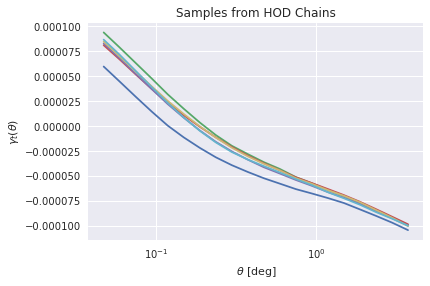

In [24]:
i = 0
for vals in chain:
    params = dict(zip(hod_param_names, vals))
    obs = emu.emulate_wrt_r(params, emu.scale_bin_centers)
    print params
    
    plt.plot(emu.scale_bin_centers, sc_inv*obs[0])

    i+=1
    if i>5:    
        break

plt.ylabel(r"$\gamma_t(\theta)$")
plt.xlabel(r"$\theta$ [deg]")
#plt.loglog()
plt.xscale('log')
plt.title("Samples from HOD Chains")
plt.show();

In [22]:
params

{'alpha': 1.4185749142197084,
 'f_c': 0.26278839151833944,
 'logM0': 14.198874133739482,
 'logM1': 14.939798303844512,
 'logMmin': 12.125572593350784,
 'sigma_logM': 0.26652924183728832}

In [20]:
obs

array([[ 0.70057714,  0.57779349,  0.44706952,  0.31610838,  0.18743617,
         0.0698536 , -0.03827371, -0.1328015 , -0.21105872, -0.27177223,
        -0.32477103, -0.37666335, -0.43030525, -0.47918318, -0.53673928,
        -0.58604445, -0.63821658, -0.69782425, -0.75097854, -0.80857929]])